# Sample Rate Accuracy Relation
In this Notebook we'll look at the relationship between accuracy and sample rate on the Diving48 dataset and the SlowFast network.

To do this, we need to combine the results from three runs:
1. `run44/stats.json` `NUM_FRAMES = 16`
2. `run19/stats.json` `NUM_FRAMES = 32`
3. `run20/stats.json` `NUM_FRAMES = 64`

All the test accuracies will be put in a single plot, and saved as a `.pgf` file so it can be nicely formatted using latex.

In [1]:
import json
import matplotlib

import numpy as np
import matplotlib.pyplot as plt

# matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [18]:
def load_stats(stats_path):
    with open(stats_path, 'r') as f:
        return json.load(f)

# Vanilla
sr16_acc_test = load_stats('run44/stats.json')['test_accuracies']
sr32_acc_test = load_stats('run9/stats.json')['test_accuracies']
sr64_acc_test = load_stats('run20/stats.json')['test_accuracies']

# RandAug
ra16_acc_test = load_stats('run4/stats.json')['test_accuracies']
ra32_acc_test = load_stats('run7/stats.json')['test_accuracies']
ra64_acc_test = load_stats('run15/stats.json')['test_accuracies']

# RandAug + Kinetics400 weights
rk32_acc_test = load_stats('run8/stats.json')['test_accuracies']
rk64_acc_test = load_stats('run22/stats.json')['test_accuracies']

max_vals_nof = sorted([max(sr16_acc_test), max(sr32_acc_test), max(sr64_acc_test)])
max_vals_ra = sorted([max(ra16_acc_test), max(ra32_acc_test), max(ra64_acc_test)])
max_vals_rk = sorted([ 0, max(rk32_acc_test), max(rk64_acc_test)])

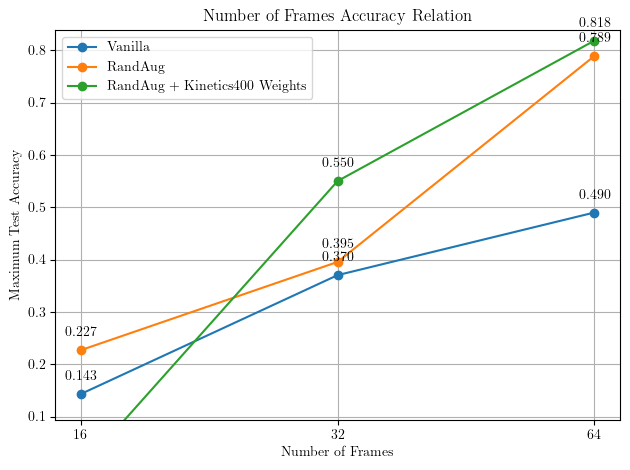

In [19]:
plt.plot(range(len(max_vals_nof)), max_vals_nof, marker='o', label='Vanilla')
for i, val in enumerate(max_vals_nof):
    plt.annotate(f'{val:.3f}', (i, val), textcoords="offset points", xytext=(0, 10), ha='center')

plt.plot(range(len(max_vals_ra)), max_vals_ra, marker='o', label='RandAug')
for i, val in enumerate(max_vals_ra):
    plt.annotate(f'{val:.3f}', (i, val), textcoords="offset points", xytext=(0, 10), ha='center')

plt.plot(range(len(max_vals_rk)), max_vals_rk, marker='o', label='RandAug + Kinetics400 Weights')
for i, val in enumerate(max_vals_rk):
    plt.annotate(f'{val:.3f}', (i, val), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Number of Frames')
plt.ylabel('Maximum Test Accuracy')
plt.title('Number of Frames Accuracy Relation')
plt.grid(True)
plt.xticks([0, 1, 2], ['16', '32', '64'])
plt.ylim(max_vals_nof[0] - 0.05, max_vals_ra[-1] + 0.05)
plt.tight_layout()
plt.legend()
plt.savefig('sample_rate_accuracy_relation.pgf')
plt.show()